In [1]:
# get test data to try out machine learning pipeline
# Conny Lin | May 20, 2020

In [4]:
# define local variables
# dataoutput dir
dir_save = '/Users/connylin/Dropbox/CA/ED _20200119 Brain Station Data Science Diploma/Capstone/data'
# test file path
pfile_test = '/Volumes/COBOLT/MWT DISCARD/20140707X_NG_100s30x10s10s_npr_wetplates/N2/20140709_173751/Rb_5x3_t96h20C_100s30x10s10s_C0109ad.drunkposture2.dat'
# wet plate folder

In [5]:
import os
import pickle
from pathlib import Path
from pathlib import PurePath
import glob
import numpy as np
import pandas as pd

## try to get wet plate files from experimet tag
* only got two

In [11]:
p = '/Volumes/COBOLT/MWT DISCARD/20140707X_NG_100s30x10s10s_npr_wetplates'
path_obj = Path(p)
subdir = glob.glob('/Volumes/COBOLT/MWT DISCARD/20140707X_NG_100s30x10s10s_npr_wetplates/*/*')
subdir
# only two plates available

['/Volumes/COBOLT/MWT DISCARD/20140707X_NG_100s30x10s10s_npr_wetplates/N2/20140709_173751',
 '/Volumes/COBOLT/MWT DISCARD/20140707X_NG_100s30x10s10s_npr_wetplates/N2/20140709_164845']

In [12]:
# get all paths
path_save = os.path.join(dir_save, 'allfilepaths.pickle')
with open(path_save,'rb') as f:
    allfiles = pickle.load(f)
allfiles[:10]

['/Volumes/COBOLT/MWT/20100201X_JC_0s0x0s0s_EE01013/N2_EE0/20100201_131356/0%_EtOH.dat',
 '/Volumes/COBOLT/MWT/20100201X_JC_0s0x0s0s_EE01013/N2_EE0/20100201_131356/0%_EtOH.png',
 '/Volumes/COBOLT/MWT/20100201X_JC_0s0x0s0s_EE01013/N2_EE0/20100201_131356/0%_EtOH.summary',
 '/Volumes/COBOLT/MWT/20100201X_JC_0s0x0s0s_EE01013/N2_EE0/20100201_131356/0%_EtOH.evan.dat',
 '/Volumes/COBOLT/MWT/20100201X_JC_0s0x0s0s_EE01013/N2_EE0/20100201_131356/0%_EtOH.drunkposture2.dat',
 '/Volumes/COBOLT/MWT/20100201X_JC_0s0x0s0s_EE01013/N2_EE0/20100201_131356/0%_EtOH_00000k.blobs',
 '/Volumes/COBOLT/MWT/20100201X_JC_0s0x0s0s_EE01013/N2_EE0/20100201_131356/0%_EtOH_00001k.blobs',
 '/Volumes/COBOLT/MWT/20100201X_JC_0s0x0s0s_EE01013/N2_EE0/20100201_131356/0%_EtOH_every60sec.trig',
 '/Volumes/COBOLT/MWT/20100201X_JC_0s0x0s0s_EE01013/N2_EE0/20100201_131356/0%_EtOH_s1.trig',
 '/Volumes/COBOLT/MWT/20100201X_JC_0s0x0s0s_EE01013/N2_EE0/20100201_131356/0%_EtOH_s5.trig']

In [13]:
# make path obj
allfiles_pathobj = list(map(lambda x: Path(x), allfiles))

In [14]:
# search if any other foler has wet plate 
ind_wet = np.fromiter(map(lambda x: x.match('*wet*'), allfiles_pathobj), dtype=np.bool)
sum(ind_wet)

0

## try to identify wet plates using worm measures

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
#load data
df = pd.read_csv(os.path.join(dir_save, 'drunkposture2_90s_95s_mean.csv'))

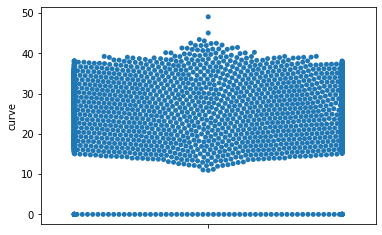

In [52]:
# plot curve and see any outlier
plt.figure()
sns.swarmplot(y='curve', data=df)
plt.show()
# there are tons of zeros. Probably ones can't get data from properly or are actually 

In [53]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,4895.0,2447.000000,1413.209114,0.000000,1223.500000,2447.000000,3670.500000,4894.000000
time,4862.0,92.499563,0.061917,90.341556,92.484848,92.500118,92.514787,92.878854
number,4862.0,59.542154,48.098739,0.000000,28.568736,49.096014,76.321654,736.100000
goodnumber,4862.0,35.134842,21.275909,0.000000,19.537520,32.953114,47.234365,140.111111
speed,4862.0,0.160702,0.063495,0.000000,0.119152,0.157478,0.196934,0.493735
length,4862.0,0.952386,0.212908,0.000000,0.860669,0.984346,1.078586,1.708762
width,4862.0,0.236346,0.061150,0.000000,0.198795,0.239599,0.276874,0.520229
aspect,4862.0,0.261861,0.074656,0.000000,0.217909,0.265571,0.306581,0.625270
kink,4862.0,41.661620,11.400845,0.000000,35.264579,41.760140,48.102380,125.221212
bias,4862.0,0.644839,0.212876,-1.000000,0.539718,0.687047,0.795695,1.000000


## build MTWDB

In [33]:
# only alcohol plates can be wet, index to alcohol ones
# get path obj
path_obj = list(map(PurePath,df['path']))
# separate into parts
path_parts = np.array(list(map(lambda x: np.array(x.parts),path_obj)))
# put in dataframe
path_parts_df= pd.DataFrame(path_parts, columns=['remove','volume','drivename','dbname','expname','groupname','mwtname','filename'])

In [33]:
# take a look at group name components
# get group name with alcohol
groupnames_expand = path_parts_df['groupname'].str.split(r'_',expand=True)
# expand each columns
for ci in groupnames_expand.columns:
    value_unique = groupnames_expand.iloc[:,ci].unique()
    print(f'\n{len(value_unique)} unique values')
    display(value_unique)
# !CONCLUSION: just need to query for "mM"


64 unique values


array(['N2', 'PS2627', 'CZ1251', 'RB1025', 'CX6161', 'RB2108', 'HH30',
       'VC266', 'RB1929', 'RB851', 'RB1792', 'RB1087', 'RB1896', 'AU98',
       'DA464', 'RB1834', 'XM1011', 'MR127', 'DA1402', 'VC116', 'RB683',
       'CB5', 'CB139', 'VC260', 'RB2051', 'HH34', 'RB1086', 'VC619',
       'DA609', 'NM1630', 'NM1968', 'RB1347', 'VC228', 'BZ142', 'CX3940',
       'DA465', 'BZ416', 'KP1097', 'MT14480', 'RB1618', 'VC922', 'DA1084',
       'RB665', 'CB1112', 'MT2633', 'KG571', 'SG1', 'VG301', 'VC1416',
       'VG202', 'VC576', 'MT14390', 'VC992', 'KC565', 'VC1038', 'KJ300',
       'VC990', 'VG513', 'VG514', 'RB982', 'MT2426', 'PFR253', 'CE1047',
       'ungroup'], dtype=object)


73 unique values


array(['EE0', 'EE10', 'EE13', None, 'ER3d', '400mM', 'Test',
       'E3d24h200mM', 'E3d24h0mM', '3d', 'g', 'i', 'k', 'f', 'h', 'j',
       'l', 'b', 'c', 'a', 'd', 'checkbook', '5d', '200mM', '300mM',
       '100mM', '500mM', 'pilot', '2d', 'ER2d', 'ER5d', 'ER4d', 'ER6d',
       'ER7d', '7d', 'TsfLiquid', 'TsfPick', 'Starve', 'TsfLiquidM9',
       'TsfLiquidM13', 'TsfLiquidTime120to180', 'TsfLiquidTime30to90',
       '600mM', 'EE5', 'EEUT', 'Paxillin100pM', 'Paxillin10mM',
       'Paxillin10pM', 'Paxillin1mM', 'Paxillin1pM', 'Paxillin10uM',
       'Paxillin1uM', 'EE0M9', 'Unknown', 'NoFood', 'E3d12h400mM',
       'badfile', 'T4d52m400mM', 'T4d52m0mM', 'E4d1h0mM', 'E4d4h0mM',
       'E4d4h400mM', 'E4d1h400mM', 'E4d2h400mM', 'E4d6h400mM', 'E4d6h0mM',
       'E4d2h0mM', '0A', '0B', '2A', '2B', '3A', '3B'], dtype=object)


33 unique values


array([None, 'R1h', 'Rvaries', '3d', 'b', 'c', 'a', 'd', 'g', 'e', 'i',
       'k', 'j', '400mM', 'TapForce1Pi', 'TapForce3Pi', 'TapForceNormal',
       'Test', 'pilot', '5d', 'TsfLiquid', 'TsfPick', 'ExpTime0min',
       'ExpTime120min', 'ExpTime30min', 'ExpTime60min', 'NoFood', 'R12h',
       'badfile', 'R1d', 'NoLid', 'ExpTime90min', 'R1'], dtype=object)


12 unique values


array([None, 'T4d400mM', 'T4d0mM', 'T4d200mM', 'TapForce3Pi',
       'TapForceNormal', 'TapForce1Pi', 'T5d0mM', 'T5d400mM', 'hT4d0mM',
       'hT4d200mM', 'E4d0mM'], dtype=object)


2 unique values


array([None, 'T5d0mM'], dtype=object)

In [40]:
# find match to mM
ind_ethanol = path_parts_df['groupname'].str.contains(r'mM')
print(path_parts_df.loc[ind_ethanol, 'groupname'].unique())


array(['N2_400mM', 'PS2627_400mM', 'N2_E3d24h200mM_R1h_T4d400mM',
       'N2_E3d24h0mM_R1h_T4d0mM', 'N2_E3d24h0mM_R1h_T4d400mM',
       'N2_E3d24h0mM_R1h_T4d200mM', 'N2_E3d24h200mM_R1h_T4d200mM',
       'N2_E3d24h200mM_Rvaries_T4d200mM', 'N2_E3d24h0mM_Rvaries_T4d200mM',
       'N2_E3d24h0mM_Rvaries_T4d400mM', 'N2_E3d24h200mM_Rvaries_T4d400mM',
       'N2_E3d24h0mM_Rvaries_T4d0mM', 'RB1025_E3d24h200mM_R1h_T4d0mM',
       'N2_E3d24h200mM_R1h_T4d0mM', 'RB1025_E3d24h0mM_R1h_T4d0mM',
       'RB1025_E3d24h0mM_R1h_T4d200mM', 'RB1025_E3d24h200mM_R1h_T4d200mM',
       'N2_400mM_3d', 'N2_200mM', 'N2_300mM', 'N2_100mM', 'N2_500mM',
       'DA609_E3d24h0mM_R1h_T4d0mM', 'DA609_E3d24h0mM_R1h_T4d200mM',
       'DA609_E3d24h200mM_R1h_T4d0mM', 'DA609_E3d24h200mM_R1h_T4d200mM',
       'N2_ER3d_400mM_TapForce3Pi', 'N2_ER3d_400mM_TapForceNormal',
       'N2_ER3d_400mM_TapForce1Pi', 'N2_400mM_Test',
       'RB1347_E3d24h0mM_R1h_T4d0mM', 'RB1347_E3d24h0mM_R1h_T4d200mM',
       'RB1347_E3d24h200mM_R1h_T4d0mM

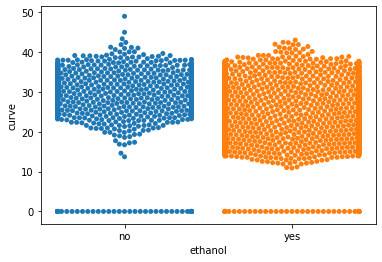

In [48]:
# split into two and see swarm plot
df['ethanol'] = 'no'
df.loc[ind_ethanol,'ethanol'] = 'yes'

plt.figure()
sns.swarmplot(x='ethanol',y='curve', data=df)
plt.show()
# there are tons of zeros. Probably ones can't get data from properly or are actually 

In [54]:
# look at curve of wet plate
pfile_test = '/Volumes/COBOLT/MWT DISCARD/20140707X_NG_100s30x10s10s_npr_wetplates/N2/20140709_173751/Rb_5x3_t96h20C_100s30x10s10s_C0109ad.drunkposture2.dat'
df['path'] == pfile_test


0       False
1       False
2       False
3       False
4       False
        ...  
4890    False
4891    False
4892    False
4893    False
4894    False
Name: path, Length: 4895, dtype: bool

In [11]:
# index to nan
ind_nan = df.isna().any(axis=1)
# take a look at plates with nan values
for p in df.loc[ind_nan,'path'].values:
    print(p)

/Volumes/COBOLT/MWT/20140604C_SJ_100s30x10s10s_goa1/N2_Test/20140604_122459/N2_5x3_t96h20C_100s30x10s10s_C0109test1.drunkposture2.dat
/Volumes/COBOLT/MWT/20140604C_SJ_100s30x10s10s_goa1/N2_Test/20140604_123049/N2_5x3_t96h20C_100s30x10s10s_C0109test1.drunkposture2.dat
/Volumes/COBOLT/MWT/20140611C_AH_300s30x10s0s_24hrspreexposure/N2_Test/20140611_134722/N2_15x0_e98h20C_300s30x10s10s_C0607aa.drunkposture2.dat
/Volumes/COBOLT/MWT/20111008C_DA_100s30x10s10s/NM1630/20111008_131610/NM1930_5x3_f95h20C_100s30x10s10s_C1004cb.drunkposture2.dat
/Volumes/COBOLT/MWT/20120120C_CL_100s30x10s10s_LiquidTsf/N2_TsfLiquidM9/20120120_164106/N2_5x3_t96h20C_100s30x10s10s_C0116ba.drunkposture2.dat
/Volumes/COBOLT/MWT/20120330C_CL_100s30x10s10s/DA465/20120330_124734/DA465_10x3_f94h20C_100s30x10s10s_C0326bb.drunkposture2.dat
/Volumes/COBOLT/MWT/20120330C_CL_100s31x10s10s_10sISIRec5min/N2/20120330_142600/N2_10x3_l95h20C_100s31x10s300s_C0326bc.drunkposture2.dat
/Volumes/COBOLT/MWT/20120623Z_BM_100s30x60s10s/NM196

In [21]:

# remove the nan
# remove zeros
# divide by ethanol groups
# take a look at the graph again for bad data

,Unnamed: 0,path,time,number,goodnumber,speed,length,width,aspect,kink,bias,curve,area,midline,morphwidth
35,35,/Volumes/COBOLT/MWT/20140604C_SJ_100s30x10s10s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36,36,/Volumes/COBOLT/MWT/20140604C_SJ_100s30x10s10s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65,65,/Volumes/COBOLT/MWT/20140611C_AH_300s30x10s0s_...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
673,673,/Volumes/COBOLT/MWT/20111008C_DA_100s30x10s10s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1136,1136,/Volumes/COBOLT/MWT/20120120C_CL_100s30x10s10s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1338,1338,/Volumes/COBOLT/MWT/20120330C_CL_100s30x10s10s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1347,1347,/Volumes/COBOLT/MWT/20120330C_CL_100s31x10s10s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1545,1545,/Volumes/COBOLT/MWT/20120623Z_BM_100s30x60s10s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1604,1604,/Volumes/COBOLT/MWT/20120928B_CL_100s31x10s10s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1605,1605,/Volumes/COBOLT/MWT/20120928B_CL_100s31x10s10s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# seems like I don't have enough wet plate data to go for this project